<a href="https://colab.research.google.com/github/paolitacute/Computer-Vision-Project-3/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image segmentation**

semanticseg.avif

# **Architectures**

- https://docs.pytorch.org/vision/main/models.html

## **UNet**

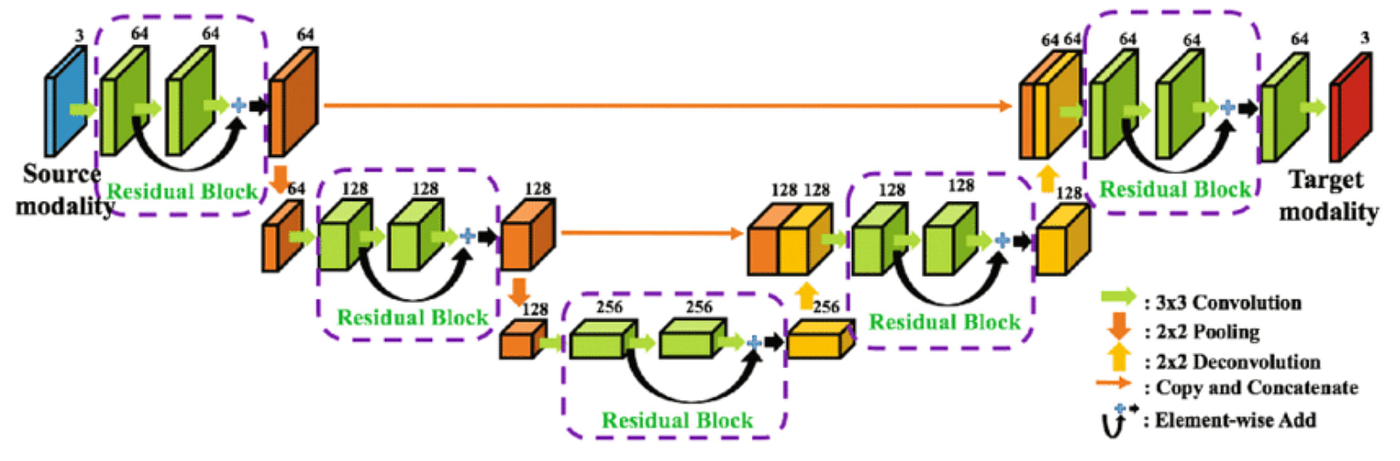

## **FCN**

Screenshot 2025-10-27 at 10.27.56 AM.png

## **Deconvolutions**

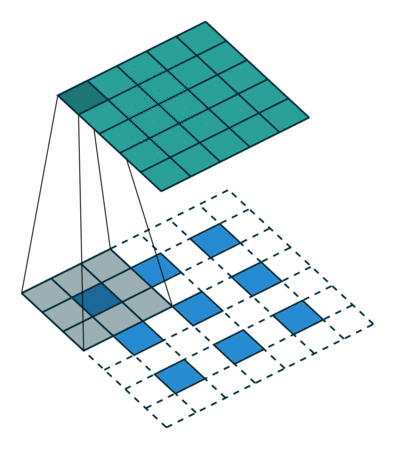

# **Dataset (Project \#1 images)**

- https://drive.google.com/drive/folders/1ecdlsPO0MsQzMRvU_oQ57AIZ9VHjXr1A?usp=drive_link

## **- 1st version: binary segmentation (ball vs background)**

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch
import cv2
import os

In [ ]:
class BilliardDataset(torch.utils.data.Dataset):
  def __init__(self, mode='train'):
    self.path = '/content/drive/MyDrive/ComputerVision/billiard'

    self.images = []
    for file in os.listdir(self.path):
      if file.endswith('.png'):
        self.images.append(file)

    self.mode = mode

  def __len__(self):
      return len(self.images)

  def __getitem__(self, idx):
    filename = self.images[idx]

    img = cv2.imread(os.path.join(self.path, filename), cv2.IMREAD_COLOR)
    h, w, c = img.shape

    mask = np.zeros((h,w), dtype=np.uint8)
    with open(os.path.join(self.path, filename.replace('.png','.txt')), 'r') as fp:
      lines = fp.read().splitlines()
    _, radius = [int(z) for z in lines[0].split()]
    for line in lines[1:]:
      x, y, label = [int(z) for z in line.split()]
      cv2.circle(mask, (x,y), radius, (255,255,255), -1)

    if self.mode == 'train':
      crop_size = 520

      dx = torch.randint(0, w-crop_size, (1,)).item()
      dy = torch.randint(0, h-crop_size, (1,)).item()

      img = img[dy:dy+crop_size,dx:dx+crop_size]
      mask = mask[dy:dy+crop_size,dx:dx+crop_size]

    return (np.transpose(img, (2, 0, 1))/255.0).astype(np.float32), (mask[np.newaxis]/255.0).astype(np.float32)

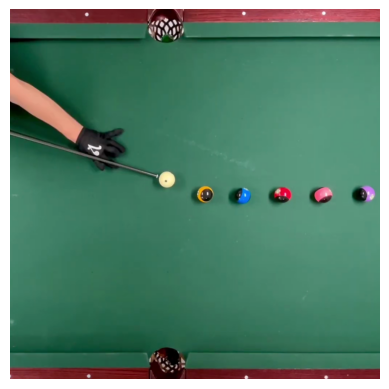

In [ ]:
train_dataset = BilliardDataset(mode='train')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

for X, y in train_dataloader:
  plt.imshow(X[0].numpy().transpose(1,2,0)[:,:,::-1])
  plt.axis('off')
  plt.show()

  plt.imshow(y[0,0].numpy(), 'gray')
  plt.axis('off')
  plt.show()

  break

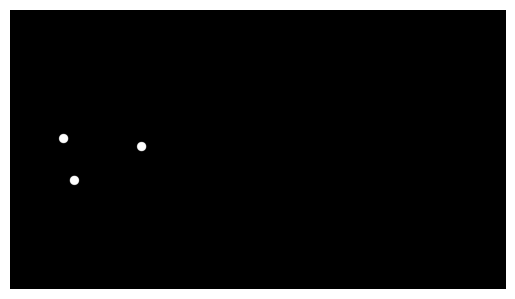

In [ ]:
val_dataset = BilliardDataset(mode='val')
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

for X, y in val_dataloader:
  plt.imshow(X[0].numpy().transpose(1,2,0)[:,:,::-1])
  plt.axis('off')
  plt.show()

  plt.imshow(y[0,0].numpy(), 'gray')
  plt.axis('off')
  plt.show()

  break

In [ ]:
model = torchvision.models.segmentation.fcn_resnet50()

print(model.classifier[4])

model.classifier[4] = torch.nn.Conv2d(512, 1, kernel_size=(1, 1), stride=(1, 1))

model.eval()

Conv2d(512, 21, kernel_size=(1, 1), stride=(1, 1))


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [ ]:
model = model.cuda() # torchvision.models.segmentation.fcn_resnet50().cuda()

train_dataset = BilliardDataset(mode='train')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

for X, y in train_dataloader:

  with torch.no_grad():
    output = model(X.cuda())

  print(output['out'].shape)

  break

torch.Size([4, 1, 520, 520])


Epoch 0
0.7292367219924927 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.6338856220245361 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.5637691617012024 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.4979953467845917 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.4109880030155182 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.3219531774520874 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.27035754919052124 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.175149604678154 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


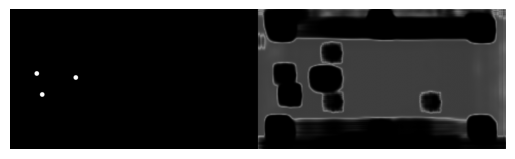

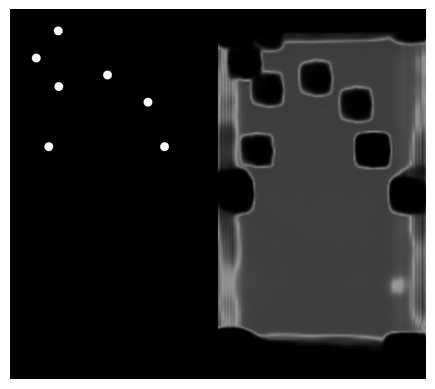

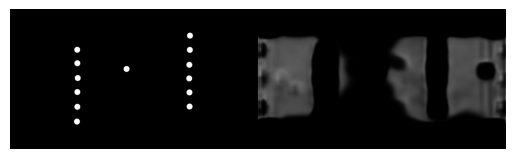

Epoch 1
0.15007257461547852 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.116167351603508 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.11829199641942978 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.09146670997142792 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.07218712568283081 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.058907050639390945 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.05426226556301117 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.06908700615167618 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


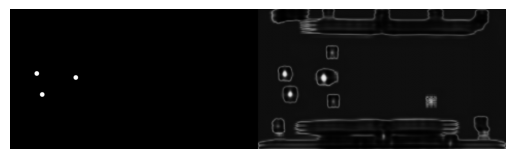

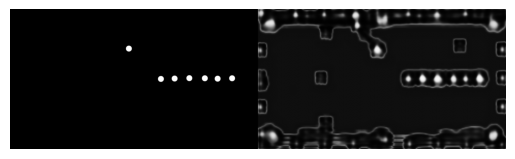

Epoch 2
0.04429490491747856 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.046477023512125015 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.03987378254532814 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.04723921790719032 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.02812325209379196 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.03220833092927933 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.02970718964934349 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.02369030937552452 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


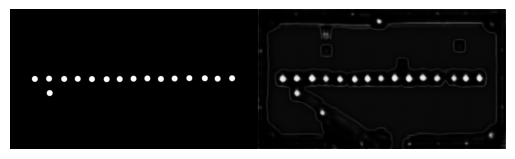

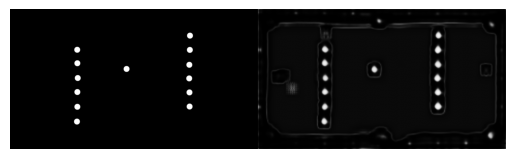

Epoch 3
0.024646081030368805 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.022827640175819397 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.023004204034805298 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.02668641321361065 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.023468075320124626 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.014987234957516193 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.019641317427158356 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.042108695954084396 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


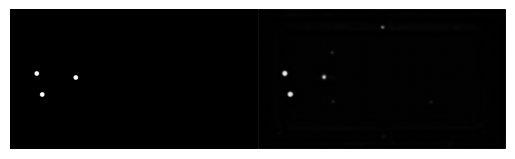

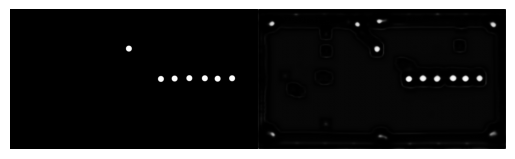

Epoch 4
0.015030420385301113 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.01598239690065384 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.019184159114956856 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.019182490184903145 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.016400862485170364 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.01480262354016304 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.014300758950412273 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.019669601693749428 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


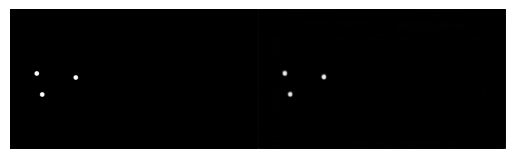

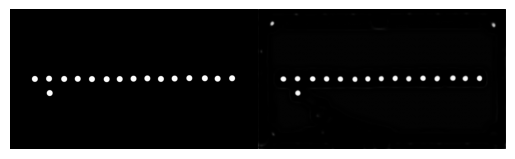

Epoch 5
0.010814367793500423 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.017915641888976097 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.011230858974158764 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.012331045232713223 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.009885658510029316 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.010003187693655491 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.010032156482338905 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.0076685259118676186 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


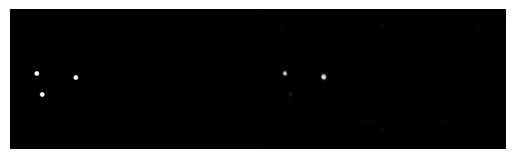

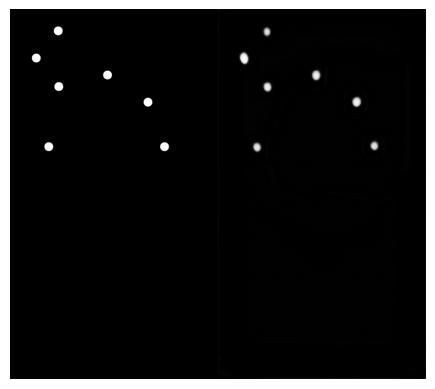

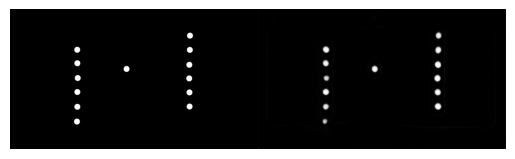

Epoch 6
0.010654979385435581 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.012673093937337399 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.012699365615844727 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.011715448461472988 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.010437925346195698 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.007912512868642807 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.009822488762438297 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.01202134508639574 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


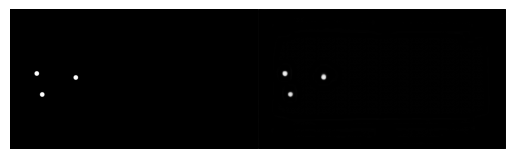

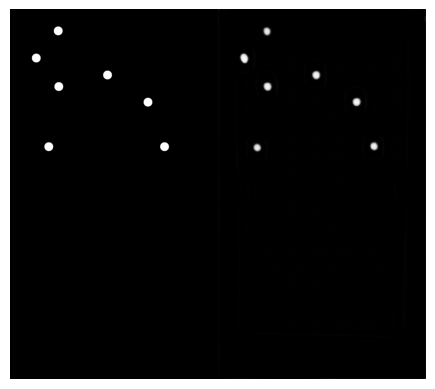

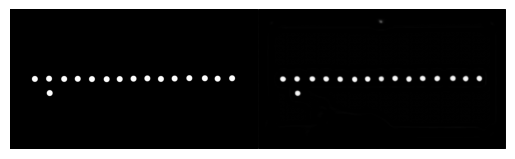

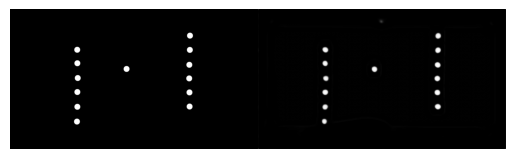

Epoch 7
0.007176614832133055 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.009007382206618786 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.00954187847673893 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.011578952893614769 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.010034066624939442 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.006370851770043373 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.006940561346709728 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.012617773376405239 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


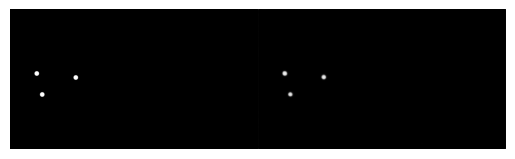

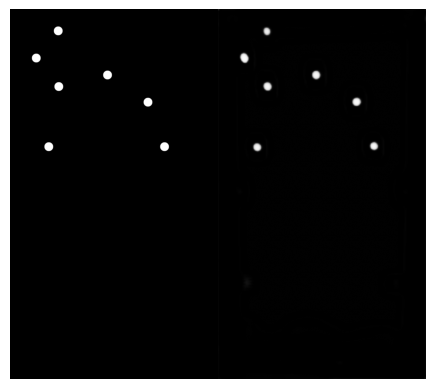

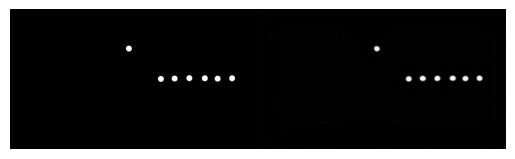

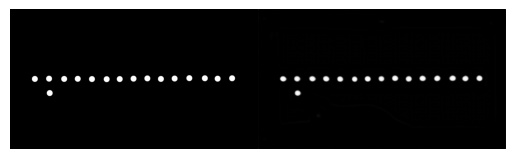

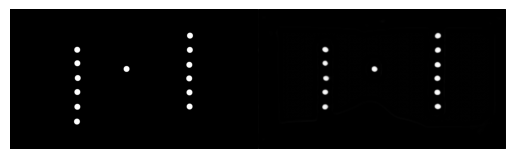

Epoch 8
0.011800450272858143 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.009096777066588402 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.009741149842739105 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.007949430495500565 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.011870218440890312 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.01092060748487711 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.007587444502860308 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.022720390930771828 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


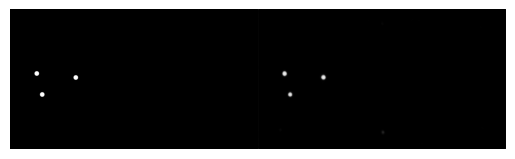

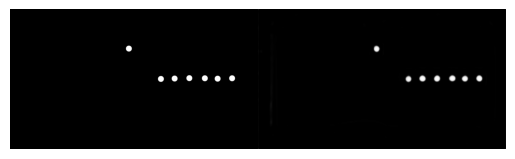

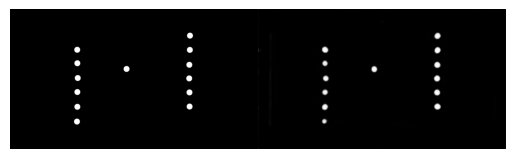

Epoch 9
0.008381571620702744 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.006103318650275469 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.013257855549454689 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.014186035841703415 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.00909225270152092 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.007219007238745689 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.006296792067587376 torch.Size([8, 1, 520, 520]) torch.Size([8, 1, 520, 520])
0.00673955911770463 torch.Size([1, 1, 520, 520]) torch.Size([1, 1, 520, 520])


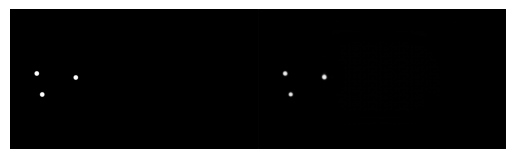

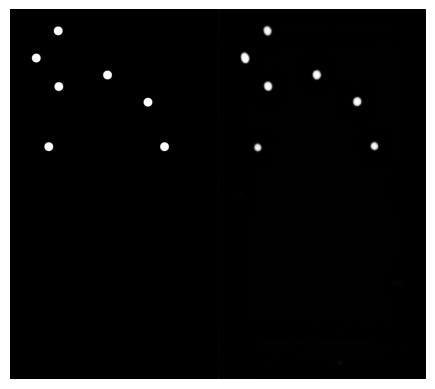

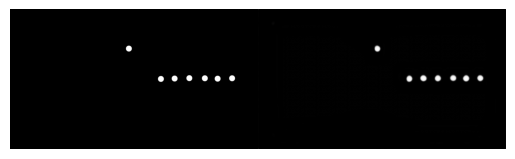

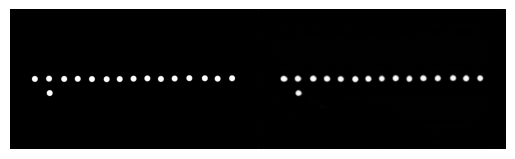

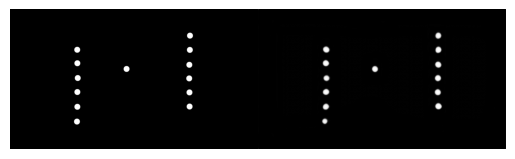

In [ ]:
model = torchvision.models.segmentation.fcn_resnet50()
model.classifier[4] = torch.nn.Conv2d(512, 1, kernel_size=(1, 1), stride=(1, 1))
model = model.cuda()

train_dataset = BilliardDataset(mode='train')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

val_dataset = BilliardDataset(mode='val')
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
  print('Epoch', epoch)

  model.train()
  for x, y in train_dataloader:
    y = y.cuda()

    optimizer.zero_grad()

    output = torch.sigmoid(model(x.cuda())['out'])

    loss = torch.nn.functional.binary_cross_entropy(output, y)

    print(loss.item(), y.shape, output.shape)

    loss.backward()
    optimizer.step()

  model.eval()
  for i, (x, y) in enumerate(val_dataloader):
    with torch.no_grad():
      output = torch.sigmoid(model(x.cuda())['out'])

    plt.imshow(np.concatenate((y[0,0].numpy(), output[0,0].cpu().numpy()), axis=1), 'gray')
    plt.axis('off')
    plt.show()

    if i == 4:
      break

## **- 2nd version: multi-class segmentation (spot ball vs regular ball vs background)**

In [ ]:
class BilliardDataset2(torch.utils.data.Dataset):
  def __init__(self, mode='train'):
    self.path = '/content/drive/MyDrive/ComputerVision/billiard'

    self.images = []
    for file in os.listdir(self.path):
      if file.endswith('.png'):
        self.images.append(file)

    self.mode = mode

  def __len__(self):
      return len(self.images)

  def __getitem__(self, idx):
    filename = self.images[idx]

    img = cv2.imread(os.path.join(self.path, filename), cv2.IMREAD_COLOR)
    h, w, c = img.shape

    mask0 = np.zeros((h,w), dtype=np.uint8)
    mask1 = np.zeros((h,w), dtype=np.uint8)
    mask2 = np.ones((h,w), dtype=np.uint8)*255.0
    with open(os.path.join(self.path, filename.replace('.png','.txt')), 'r') as fp:
      lines = fp.read().splitlines()
    _, radius = [int(z) for z in lines[0].split()]
    for line in lines[1:]:
      x, y, label = [int(z) for z in line.split()]
      if label == 0:
        cv2.circle(mask0, (x,y), radius, (255,255,255), -1)
      else:
        cv2.circle(mask1, (x,y), radius, (255,255,255), -1)
      cv2.circle(mask2, (x,y), radius, (0,0,0), -1)
    mask = np.stack((mask0, mask1, mask2), axis=-1)

    if self.mode == 'train':
      crop_size = 520

      dx = torch.randint(0, w-crop_size, (1,)).item()
      dy = torch.randint(0, h-crop_size, (1,)).item()

      img = img[dy:dy+crop_size,dx:dx+crop_size]
      mask = mask[dy:dy+crop_size,dx:dx+crop_size]

    return (np.transpose(img, (2, 0, 1))/255.0).astype(np.float32), (np.transpose(mask, (2, 0, 1))/255.0).astype(np.float32)

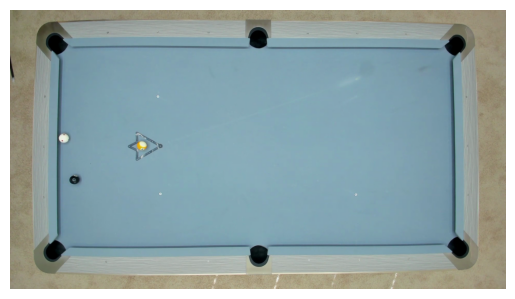

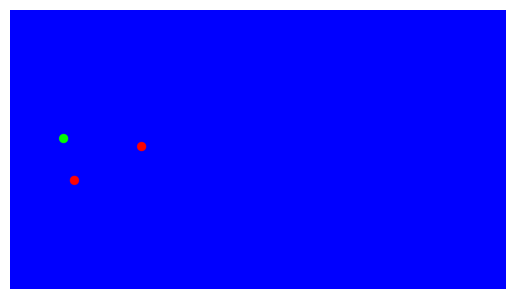

In [ ]:
val_dataset = BilliardDataset2(mode='val')
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

for X, y in val_dataloader:
  plt.imshow(X[0].numpy().transpose(1,2,0)[:,:,::-1])
  plt.axis('off')
  plt.show()

  plt.imshow(y[0].numpy().transpose(1,2,0))
  plt.axis('off')
  plt.show()

  break

Epoch 1 : 0.7789938261634425
Epoch 2 : 0.08099845979820218
Epoch 3 : 0.024368915510805028
Epoch 4 : 0.014036780819623616
Epoch 5 : 0.012234962365606375
Epoch 6 : 0.01085698399529384
Epoch 7 : 0.011463358524467861
Epoch 8 : 0.009092707088903376
Epoch 9 : 0.00859158071117443
Epoch 10 : 0.009486200843463865


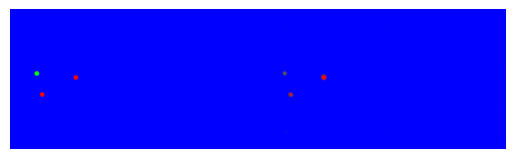

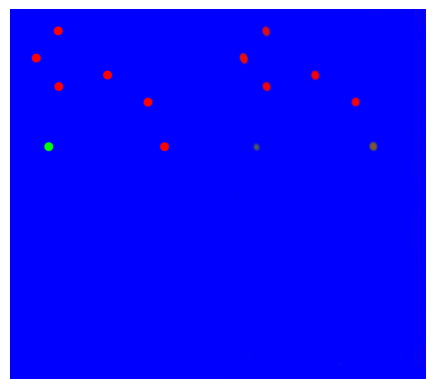

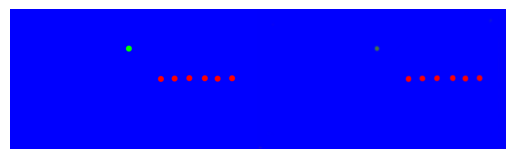

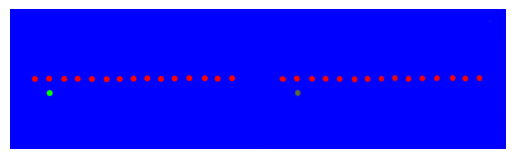

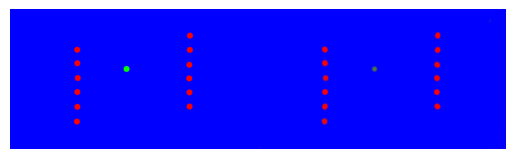

Epoch 11 : 0.008336964373787245
Epoch 12 : 0.007209190020435735
Epoch 13 : 0.007099212269837919
Epoch 14 : 0.006588862457296304
Epoch 15 : 0.007267857329887256
Epoch 16 : 0.008991492078884653
Epoch 17 : 0.005823890899160975
Epoch 18 : 0.005446042179277069
Epoch 19 : 0.005643759135222226
Epoch 20 : 0.004769351562125641


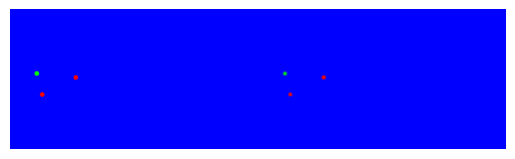

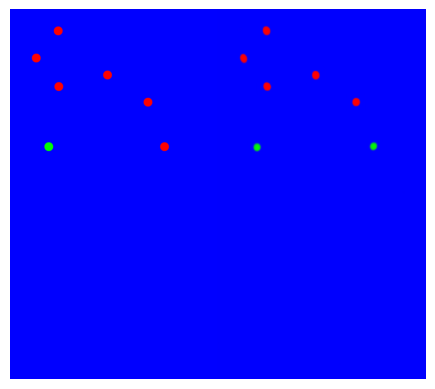

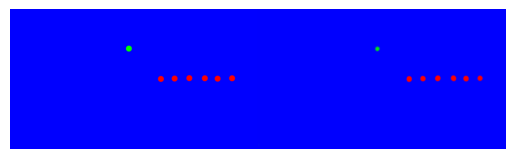

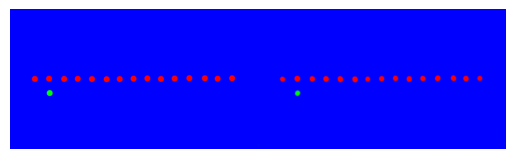

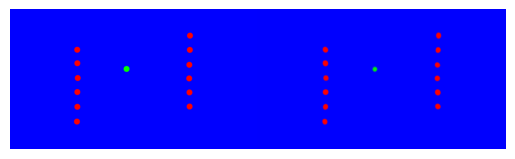

Epoch 21 : 0.006089946826952591
Epoch 22 : 0.005929904646779362
Epoch 23 : 0.005813206525584846
Epoch 24 : 0.005164855707175376
Epoch 25 : 0.004055055389344169
Epoch 26 : 0.003468241101424945
Epoch 27 : 0.0035700521007049502
Epoch 28 : 0.0034207453483535923
Epoch 29 : 0.003131907276008605
Epoch 30 : 0.003057506621668213


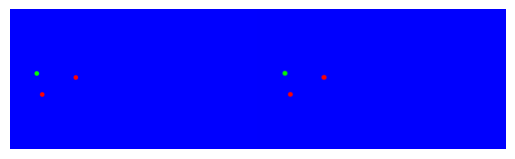

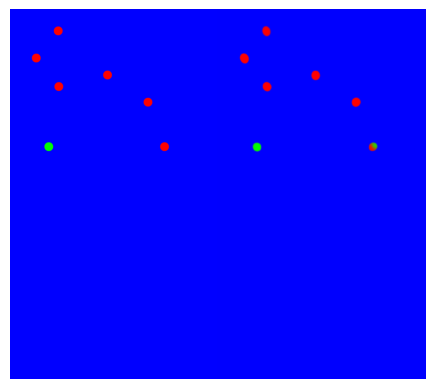

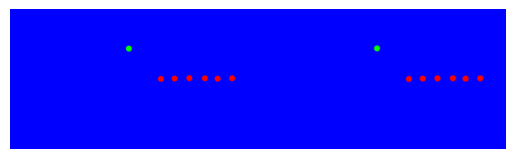

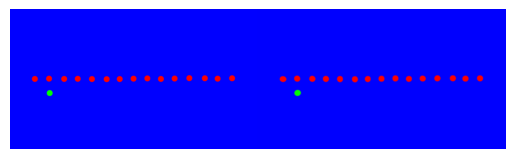

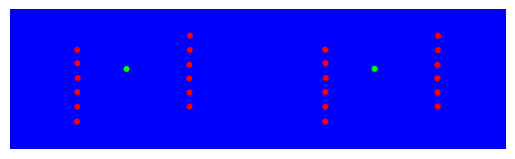

Epoch 31 : 0.003715086646639464
Epoch 32 : 0.005410231421129745
Epoch 33 : 0.0033928133514628074
Epoch 34 : 0.004062578899034283
Epoch 35 : 0.004725314006862933
Epoch 36 : 0.005608888416502036
Epoch 37 : 0.003812842430514202
Epoch 38 : 0.0037210479689141116
Epoch 39 : 0.004514275216742566
Epoch 40 : 0.004816652030537003


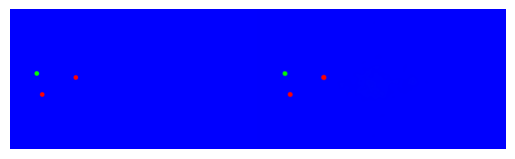

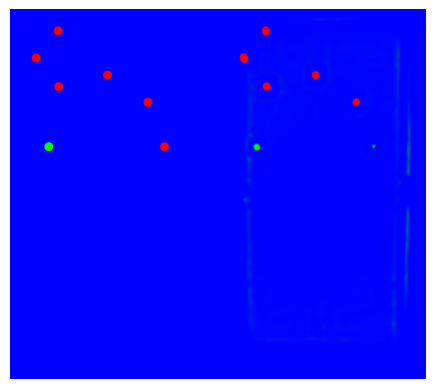

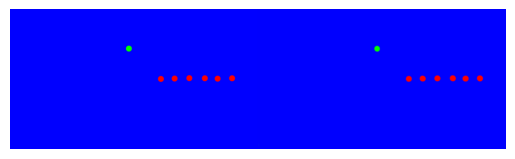

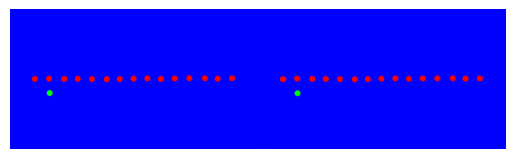

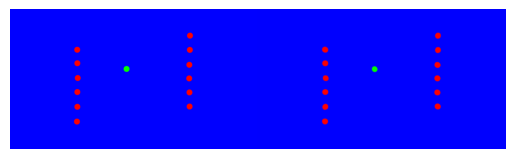

Epoch 41 : 0.005912281997632562
Epoch 42 : 0.005277827958037194
Epoch 43 : 0.0036888886794545933
Epoch 44 : 0.004129650512416112
Epoch 45 : 0.003329792999450052
Epoch 46 : 0.003226113734407383
Epoch 47 : 0.0027656806183554102
Epoch 48 : 0.0027299794499157813
Epoch 49 : 0.0033350168102371847
Epoch 50 : 0.0026663824458394133


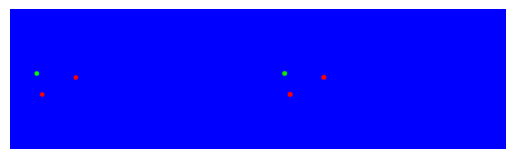

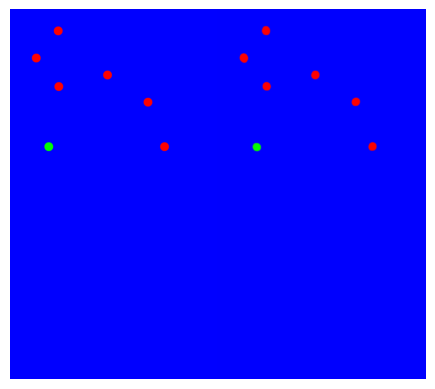

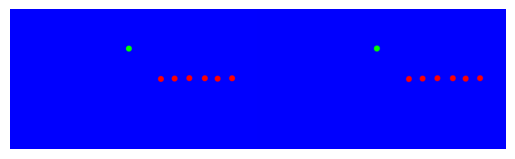

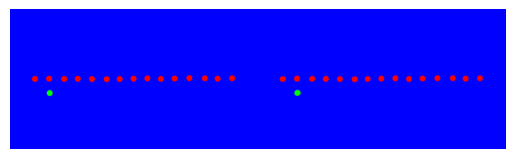

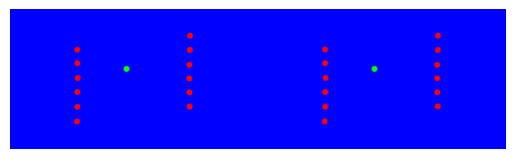

Epoch 51 : 0.004822411541745328
Epoch 52 : 0.004138885360015066
Epoch 53 : 0.004836977718871806
Epoch 54 : 0.0038888186314388327
Epoch 55 : 0.0032358392337827305
Epoch 56 : 0.004186448234688948
Epoch 57 : 0.0034871695010734952
Epoch 58 : 0.002574626225651356
Epoch 59 : 0.0024136421245138833
Epoch 60 : 0.0025975006906184973


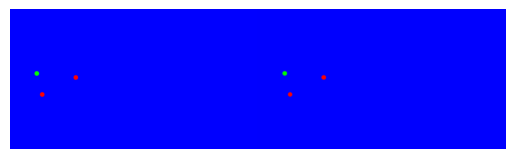

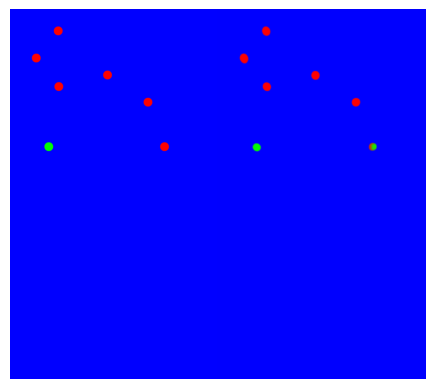

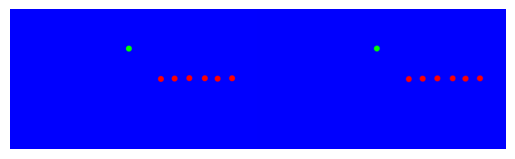

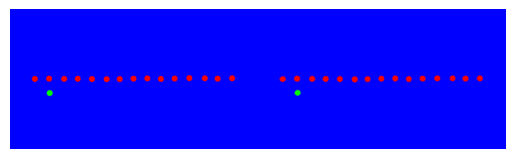

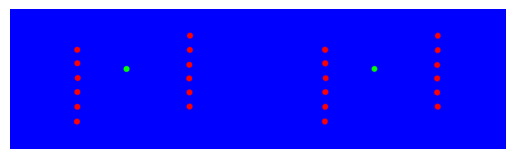

Epoch 61 : 0.002753954915852662
Epoch 62 : 0.002900010432329094
Epoch 63 : 0.0031215929834217063
Epoch 64 : 0.003123932985768637
Epoch 65 : 0.003016856955486889
Epoch 66 : 0.0024302116347060198
Epoch 67 : 0.0021354124815971182
Epoch 68 : 0.002176222007460239
Epoch 69 : 0.002458417855035677
Epoch 70 : 0.002818980664750071


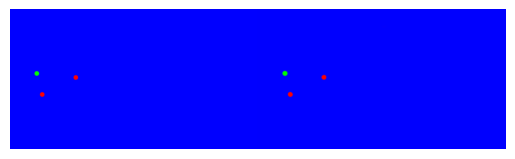

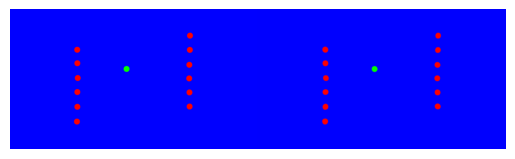

Epoch 71 : 0.0022534118687505262
Epoch 72 : 0.0025818114610094774
Epoch 73 : 0.002784205559771835
Epoch 74 : 0.002116116490868623
Epoch 75 : 0.0020294063071017725
Epoch 76 : 0.002484142420846119
Epoch 77 : 0.0028117310762274684
Epoch 78 : 0.0024815132155230173
Epoch 79 : 0.0029102490495955735
Epoch 80 : 0.0030419261505206427


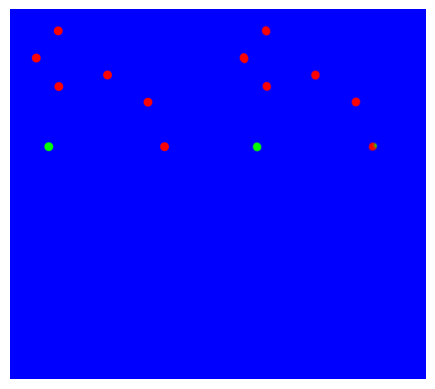

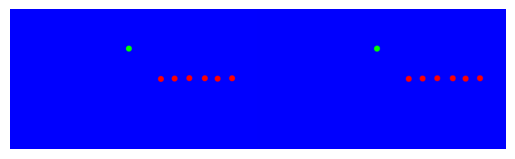

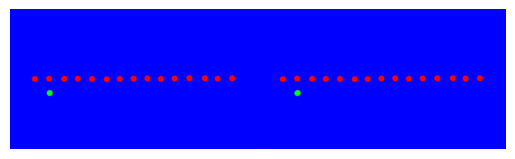

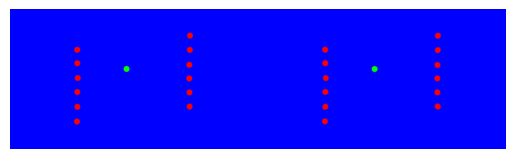

Epoch 81 : 0.002200818727336203
Epoch 82 : 0.0021583890300366634
Epoch 83 : 0.0018176354361665354
Epoch 84 : 0.0019794690684137636
Epoch 85 : 0.0019976791329355094
Epoch 86 : 0.0025620934157223815
Epoch 87 : 0.0018941030649697048
Epoch 88 : 0.0020366527728344266
Epoch 89 : 0.001736936302398119
Epoch 90 : 0.0017984869579474132


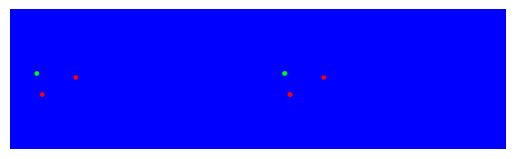

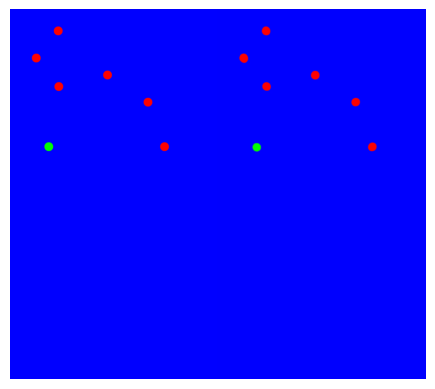

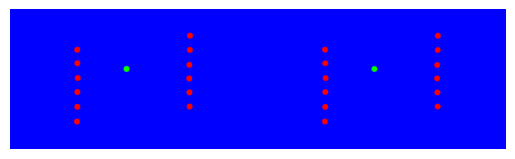

Epoch 91 : 0.00285554309620669
Epoch 92 : 0.002608985836176496
Epoch 93 : 0.002547775894830314
Epoch 94 : 0.0024016679289113533
Epoch 95 : 0.0023511415184067005
Epoch 96 : 0.002085366932748768
Epoch 97 : 0.0021387789431109765
Epoch 98 : 0.002703630434872027
Epoch 99 : 0.002403246949573881
Epoch 100 : 0.002733850966027954


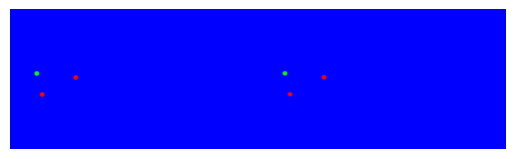

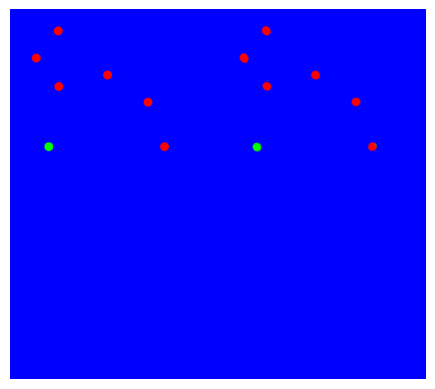

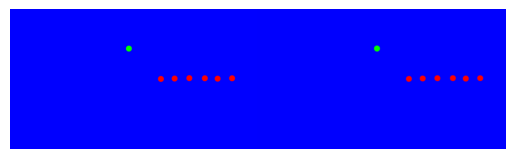

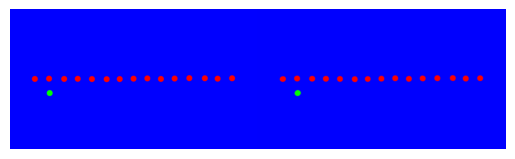

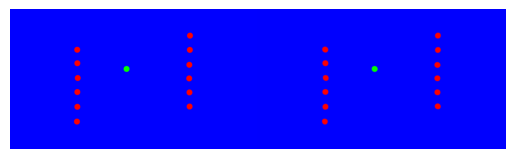

In [ ]:
model = torchvision.models.segmentation.fcn_resnet50()
model.classifier[4] = torch.nn.Conv2d(512, 3, kernel_size=(1, 1), stride=(1, 1))
model = model.cuda()

train_dataset = BilliardDataset2(mode='train')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

val_dataset = BilliardDataset2(mode='val')
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
  #print('Epoch', epoch)

  model.train()
  loss_sum = 0.0
  for x, y in train_dataloader:
    y = y.cuda()

    optimizer.zero_grad()

    output = model(x.cuda())['out']

    loss = torch.nn.functional.cross_entropy(output, y)

    loss.backward()
    optimizer.step()

    loss_sum += loss.item() * len(x)

  print('Epoch', epoch+1, ':', loss_sum/len(train_dataset))

  if epoch%10 == 9:
    model.eval()
    for i, (x, y) in enumerate(val_dataloader):
      with torch.no_grad():
        output = torch.softmax(model(x.cuda())['out'], dim=1)

      plt.imshow(np.concatenate((y[0].numpy().transpose(1,2,0), output[0].cpu().numpy().transpose(1,2,0)), axis=1))
      plt.axis('off')
      plt.show()

      if i == 4:
        break
